### Objective: The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Your objective is to determine the age of Abalone from the physical measurements.

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
#Read the data
data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/training_set_label.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,F,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.208,10
1,F,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.140,9
2,M,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.780,18
3,F,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.600,19
4,M,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345,12


Here age is determined by rings + 1.5 years

In [3]:
#Get the test data
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/testing_set_label.csv')
test_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,F,0.555,0.445,0.175,1.1465,0.5510,0.2440,0.2785
1,I,0.360,0.270,0.090,0.2190,0.0970,0.0405,0.0650
2,I,0.395,0.320,0.100,0.3075,0.1490,0.0535,0.0900
3,F,0.585,0.450,0.170,0.8685,0.3325,0.1635,0.2700
4,F,0.575,0.460,0.160,1.1030,0.5380,0.2210,0.2490


In [4]:
test_data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
dtype: int64

In [5]:
#Data describe
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3132.000000,3132.000000,3132.000000,3132.00000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.523707,0.407952,0.139277,0.82867,0.359229,0.180731,0.239159,9.947957
std,0.119891,0.099336,0.038991,0.49063,0.221946,0.109924,0.139040,3.230252
min,0.110000,0.090000,0.000000,0.00800,0.002500,0.000500,0.003000,2.000000
25%,0.450000,0.350000,0.115000,0.44150,0.185375,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.79950,0.335500,0.170000,0.235000,10.000000
75%,0.615000,0.480000,0.165000,1.15300,0.499500,0.252500,0.330000,11.000000
max,0.815000,0.650000,0.515000,2.82550,1.488000,0.760000,1.005000,29.000000


In [6]:
#Info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3132 non-null   object 
 1   Length          3132 non-null   float64
 2   Diameter        3132 non-null   float64
 3   Height          3132 non-null   float64
 4   Whole weight    3132 non-null   float64
 5   Shucked weight  3132 non-null   float64
 6   Viscera weight  3132 non-null   float64
 7   Shell weight    3132 non-null   float64
 8   Rings           3132 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 220.3+ KB


In [7]:
#Check for null values
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
#Divide the data into features and target
features = data.drop(['Rings'], axis=1)
target = data['Rings']

print(features.shape)
print(target.shape)

(3132, 8)
(3132,)


In [9]:
#Divide the data into train and validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.75, random_state=42)
print(X_train.shape)
print(X_test.shape)

(2349, 8)
(783, 8)


In [10]:
#Replace the gender values with int
val = {'F': 0, 'M': 1, 'I':2}
X_train['Sex'] = X_train['Sex'].map(val)
X_test['Sex'] = X_test['Sex'].map(val)
test_data['Sex'] = test_data['Sex'].map(val)
X_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
573,1,0.605,0.475,0.155,1.1610,0.5720,0.2455,0.2750
3057,0,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050
2848,1,0.620,0.500,0.165,1.3070,0.6355,0.2545,0.3150
1213,1,0.645,0.515,0.240,1.5415,0.4710,0.3690,0.5350
2093,2,0.550,0.425,0.145,0.8900,0.4325,0.1710,0.2360
...,...,...,...,...,...,...,...,...
3092,2,0.405,0.300,0.085,0.3035,0.1500,0.0505,0.0880
1095,2,0.515,0.380,0.120,0.6250,0.3265,0.1295,0.1600
1130,1,0.575,0.435,0.150,0.8050,0.2930,0.1625,0.2700
1294,0,0.675,0.565,0.195,1.8375,0.7645,0.3615,0.5530


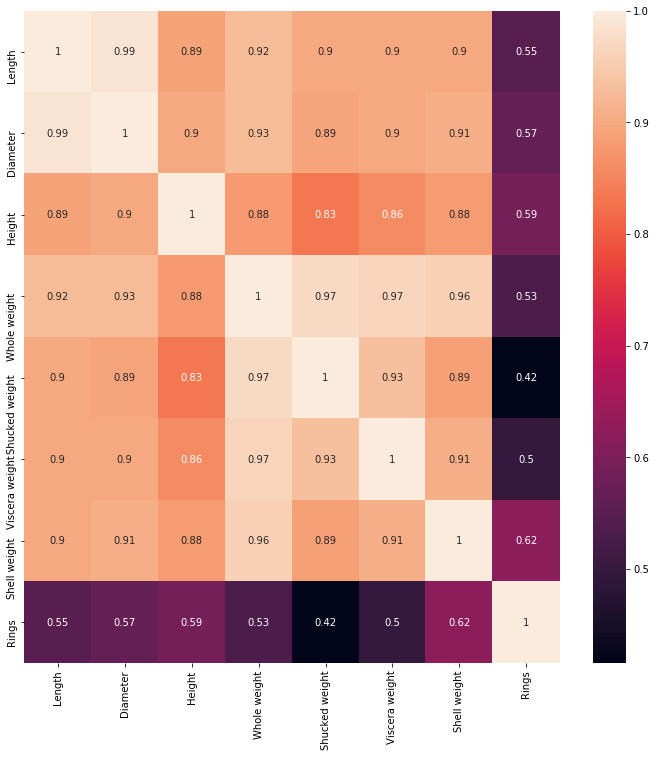

In [11]:
#Get the correlation among numeric data
plt.rcParams['figure.figsize'] = 12, 12
sns.heatmap(data.corr(), annot=True)

In [12]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = False)
lr_model = lr.fit(X_train, y_train)

In [13]:
print("Model intercept: ", lr_model.intercept_)
print("Model co-efficient: ", lr_model.coef_)

Model intercept:  3.7403379328314896
Model co-efficient:  [ -0.33347476  -1.54239374  10.26471296  19.69227671  11.91772846
 -22.92618374 -13.78504994   5.35352663]


In [14]:
y_pred = lr_model.predict(X_test)
#Accuraacy
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred) ** 0.5)

2.168974066291203


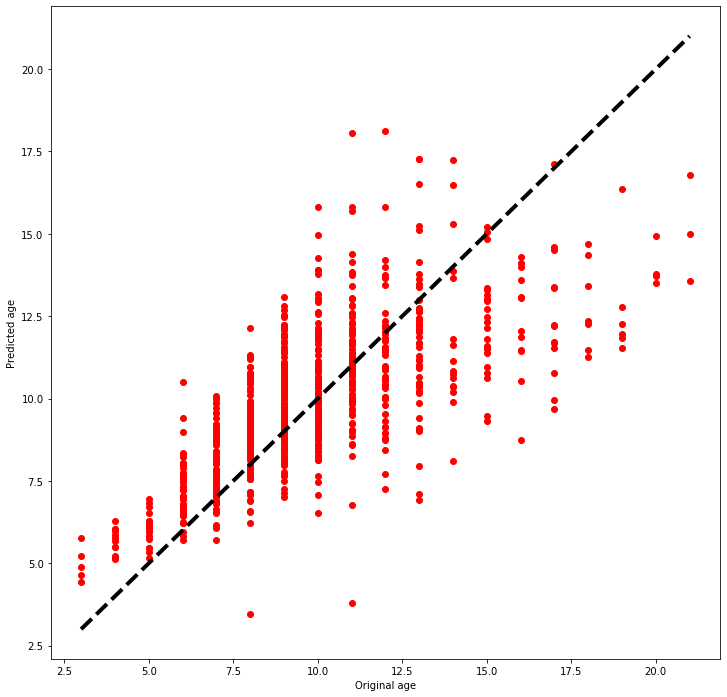

In [15]:
#View predictions
plt.scatter(y_test, y_pred, color='r')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Original age")
plt.ylabel("Predicted age")
plt.show()

In [16]:
y_hat = lr_model.predict(test_data)
prediction = pd.DataFrame(y_hat, columns=['prediction']).to_csv('results.csv', index=False, header=True)

#### RidgeRegression (To reduce the co-efficients of the model)

In [17]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=False)
ridge_model = ridgecv.fit(X_train, y_train)

In [18]:
ridge_model.alpha_

0.08148754173103201

In [19]:
print("Model intercept  : ", ridge_model.intercept_, "\n")
print("Model coefficient: ", ridge_model.coef_, "\n")

Model intercept  :  3.8360991572954504 

Model coefficient:  [ -0.3408112   -0.55063741   9.22974814  17.63458501  11.27580737
 -22.28844442 -12.73996762   6.2519084 ] 



In [20]:
y_pred = ridge_model.predict(X_test)
#Accuraacy
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred) ** 0.5)

2.1619917218198856


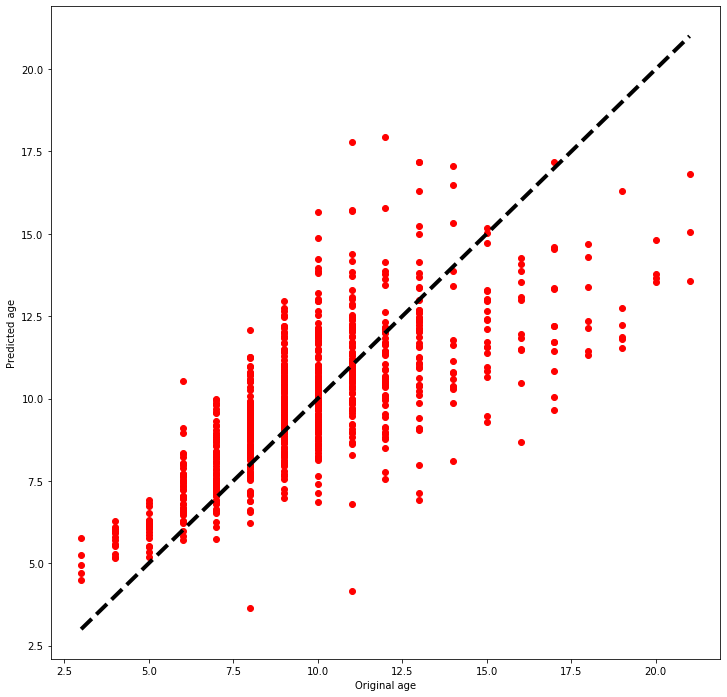

In [21]:
#View predictions
plt.scatter(y_test, y_pred, color='r')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Original age")
plt.ylabel("Predicted age")
plt.show()

In [22]:
y_hat = ridge_model.predict(test_data)
prediction = pd.DataFrame(y_hat, columns=['prediction']).to_csv('results.csv', index=False, header=True)

#### Lasso Regression (To reduce the model features)

In [23]:
from sklearn.linear_model import Lasso, LassoCV
lassocv = LassoCV(alphas=alphas, normalize=False)
lasso_model = lassocv.fit(X_train, y_train)

In [24]:
lasso_model.alpha_

0.005

In [25]:
print("Model intercept  : ", lasso_model.intercept_, "\n")
for i in range(len(X_train.columns)):
    print(X_train.columns[i], ": ", lasso_model.coef_[i])

Model intercept  :  5.095487996397532 

Sex :  -0.37749667846862783
Length :  0.0
Diameter :  7.477360328108701
Height :  5.54916552493976
Whole weight :  7.581388989845765
Shucked weight :  -18.565561540829776
Viscera weight :  -3.6171509995559292
Shell weight :  10.279571117698495


Length is ignored, which makes the model bad

In [26]:
y_pred = lasso_model.predict(X_test)
#Accuraacy
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred) ** 0.5)

2.1504092619971553


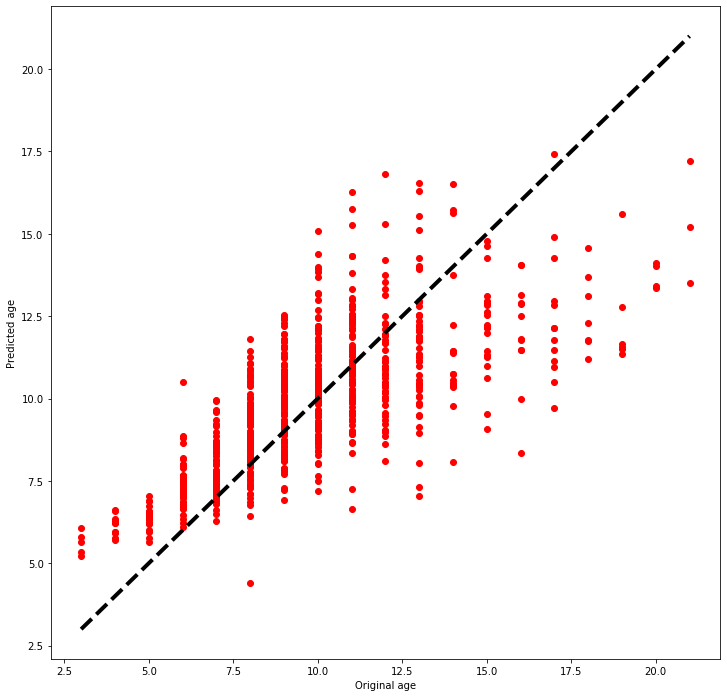

In [27]:
#View predictions
plt.scatter(y_test, y_pred, color='r')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Original age")
plt.ylabel("Predicted age")
plt.show()

In [28]:
y_hat = lasso_model.predict(test_data)
prediction = pd.DataFrame(y_hat, columns=['prediction']).to_csv('results.csv', index=False, header=True)

#### Random Forest Regressor

In [29]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
rf = RandomForestRegressor(n_estimators = 90, max_features='sqrt',max_depth=8, min_samples_leaf= 10,n_jobs=-1)
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
#Accuraacy
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred) ** 0.5)
y_hat = rf_model.predict(test_data)
prediction = pd.DataFrame(y_hat, columns=['prediction']).to_csv('results.csv', index=False, header=True)

2.116638430797853


In [30]:
#HyperParameter Tuning on RandomForest Regression
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [31]:
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)

# rf_random.best_params_

In [32]:
rf = RandomForestRegressor(n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=30, bootstrap=True)
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("RMSE: ", mean_squared_error(y_pred, y_test) ** 0.5)
y_hat = rf_model.predict(test_data)
prediction = pd.DataFrame(y_hat, columns=['prediction']).to_csv('results.csv', index=False, header=True)

RMSE:  2.08676156496391
